<a href="https://colab.research.google.com/github/jonabaroadsrp/dsrp/blob/main/Desafio1_DesafioLatam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 🧠 Análisis de Datos Inmobiliarios - Desafío Latam

## 📌 **1º Seccion: Preguntas conceptuales**

### **1. ¿Cuál es la diferencia entre el aprendizaje supervisado y el aprendizaje  no supervisado?**

#### R. Aprendizaje supervisado, usa datos etiquetados, y el aprendizaje no supervisado, usa datos sin etiquetar.

### **2.** En la industria de la salud, a menudo se utiliza el machine learning ara predecir la probabilidad de enfermedades o condiciones médicas en función de diferentes variables de entrada, como síntomas, antecedentes médicos y factores de estilo de vida. Imagina que tienes un conjunto de datos que contiene información de pacientes y su diagnóstico (enfermo/no enfermo). **¿Qué tipo de aprendizaje utilizarías para construir un modelo predictivo?**

#### R. Utilizaría aprendizaje supervisado (clasificación), ya que contamos con datos de entrada (síntomas, estilo de vida, etc.) y etiquetas de salida (diagnóstico: enfermo/no enfermo).

### **3. ¿Por qué razón es necesario dividir el set de datos en 2 set de datos al momento de realizar algún modelamiento supervisado? ¿Cuáles son los 2 set de datos y cúal es la función de cada uno?**

#### R. Se divide para evaluar el desempeño del modelo con datos no vistos previamente, y evitar el sobreajuste.

* Training set: Se usa para entrenar el modelo.
* Test set: Se usa para evaluar qué tan bien generaliza el modelo a nuevos datos.

### **4. ¿Cuál es la principal diferencia en el modelamiento de la regresión lineal para un enfoque estadístico y un enfoque de aprendizaje de máquinas?**

#### R.

* Enfoque estadístico: busca interpretar la relación entre variables, evalúa significancia estadística, supuestos clásicos.

* Machine Learning: prioriza la precisión predictiva, no necesariamente la interpretación; puede ignorar algunos supuestos si mejora la predicción.

### **5. Escoge una industria de acuerdo a su área de interés, rubro de trabajo o área de estudios. Menciona al menos 1 aplicación en esa industria de:**
*   a. Aprendizaje Supervisado (Clasificación)
*   b. Aprendizaje Supervisado (Regresión)
*   c. Aprendizaje No Supervisado (Clustering)
*   d. Aprendizaje No Supervisado (Reducción de dimensionalidad)

#### R. Aplicaciones según industria, "Retail"

* a. Clasificación: Identificar si un cliente comprará o no según su historial.
* b. Regresión: Predecir ventas de un producto según la época del año.
* c. Clustering: Agrupar clientes con patrones de compra similares.
* d. Reducción de dimensionalidad: Visualizar productos según comportamiento de compra en menos dimensiones.

## 📌 **2º Seccion: Implementación de modelo, regresión lineal.**

### Paso 1: Comprensión del problema

### 📊 Paso 2: Recolección y carga de datos.

*	✅ 2.1 Cargar librerías necesarias.
*	✅ 2.2 Cargar los datos desde archivo Excel.

#### 2.1 Cargar librerías necesarias.

In [3]:
# Importamos las librerías necesarias para análisis y visualización
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#### Paso 2.2 Cargar los datos desde archivo Excel

In [4]:
# Se importa ael rchivo desde el equipo al colab
from google.colab import files
uploaded = files.upload()

# Se verifica que el archivo se haya subido correctamente
for name in uploaded:
    print(f"Archivo cargado: {name}")

Saving data-housing.xlsx to data-housing.xlsx
Archivo cargado: data-housing.xlsx


In [5]:
# Se carga el archivo Excel en un DataFrame
df = pd.read_excel('data-housing.xlsx')
df.head()

,price,area,bedrooms,bathrooms,stories,guestroom,hotwaterheating,airconditioning,parking
0,13300000,7420,4,2,3,no,no,yes,2
1,12250000,8960,4,4,4,no,no,yes,3
2,12250000,9960,3,2,2,no,no,no,2
3,12215000,7500,4,2,2,no,no,yes,3
4,11410000,7420,4,1,2,yes,no,yes,2


### 📊 Paso 3. Exploración de datos (EDA)

*	✅ 3.1 Verificar y revisar la estructura del dataset / (Data exploration).
*	✅ 3.2 Detectar valores nulos y tipos de datos.
*	✅ 3.3 Visualizar correlaciones.


#### 3.1 Verificar y revisar la estructura del dataset / (Data exploration)

In [13]:
# Se visualizan las primeras filas del DataFrame con sus deimensiones.
display(df.head())

,price,area,bedrooms,bathrooms,stories,guestroom,hotwaterheating,airconditioning,parking
0,13300000,7420,4,2,3,no,no,yes,2
1,12250000,8960,4,4,4,no,no,yes,3
2,12250000,9960,3,2,2,no,no,no,2
3,12215000,7500,4,2,2,no,no,yes,3
4,11410000,7420,4,1,2,yes,no,yes,2


In [14]:
# Se exponen las estadististicas descriptivas del dataset.

df.describe().applymap(lambda x: f'{x:.3f}')

<ipython-input-14-99ca119ab8b1>:3: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df.describe().applymap(lambda x: f'{x:.3f}')


,price,area,bedrooms,bathrooms,stories,parking
count,545.000,545.000,545.000,545.000,545.000,545.000
mean,4766729.248,5150.541,2.965,1.286,1.806,0.694
std,1870439.616,2170.141,0.738,0.502,0.867,0.862
min,1750000.000,1650.000,1.000,1.000,1.000,0.000
25%,3430000.000,3600.000,2.000,1.000,1.000,0.000
50%,4340000.000,4600.000,3.000,1.000,2.000,0.000
75%,5740000.000,6360.000,3.000,2.000,2.000,1.000
max,13300000.000,16200.000,6.000,4.000,4.000,3.000


####	3.2 Detectar valores nulos y tipos de datos


In [15]:
# Se revisa la cantidad de valores nulos.
print("\nMissing values:\n", df.isnull().sum())


Missing values:
 price              0
area               0
bedrooms           0
bathrooms          0
stories            0
guestroom          0
hotwaterheating    0
airconditioning    0
parking            0
dtype: int64


In [16]:
# Se revisa la cantidad de eventos y el tipo de variable.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   price            545 non-null    int64   
 1   area             545 non-null    int64   
 2   bedrooms         545 non-null    int64   
 3   bathrooms        545 non-null    int64   
 4   stories          545 non-null    int64   
 5   guestroom        545 non-null    category
 6   hotwaterheating  545 non-null    category
 7   airconditioning  545 non-null    category
 8   parking          545 non-null    int64   
dtypes: category(3), int64(6)
memory usage: 27.6 KB


####	3.3 Visualizar correlaciones.

In [17]:
# Se analisa las correlaciones entre las variables (solo las numericas)
numerical_df = df.select_dtypes(include=['number'])
print("\nCorrelation matrix (numerical features):\n", numerical_df.corr())


Correlation matrix (numerical features):
               price      area  bedrooms  bathrooms   stories   parking
price      1.000000  0.535997  0.366494   0.517545  0.420712  0.384394
area       0.535997  1.000000  0.151858   0.193820  0.083996  0.352980
bedrooms   0.366494  0.151858  1.000000   0.373930  0.408564  0.139270
bathrooms  0.517545  0.193820  0.373930   1.000000  0.326165  0.177496
stories    0.420712  0.083996  0.408564   0.326165  1.000000  0.045547
parking    0.384394  0.352980  0.139270   0.177496  0.045547  1.000000


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128279 (\N{LINK SYMBOL}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


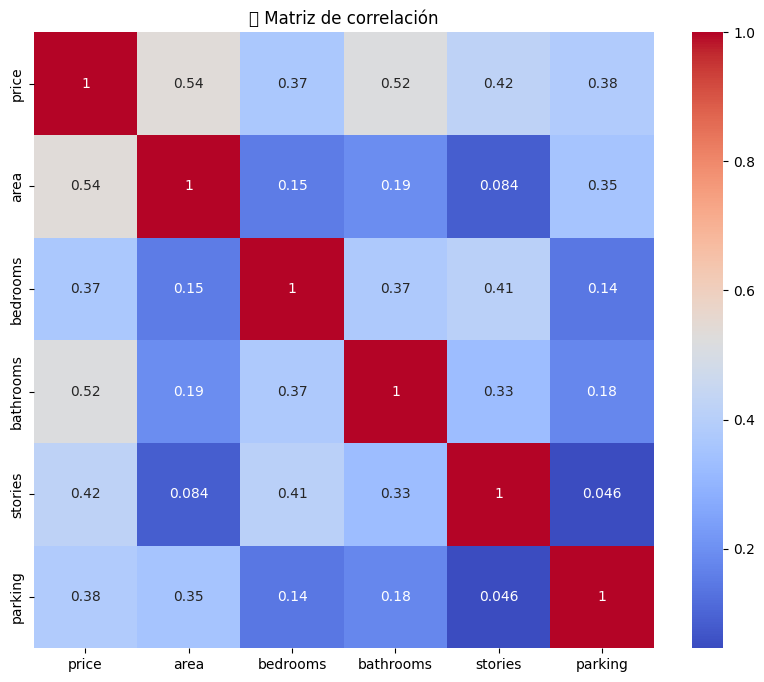

In [18]:
plt.figure(figsize=(10, 8))
sns.heatmap(numerical_df.corr(), annot=True, cmap='coolwarm')
plt.title("🔗 Matriz de correlación")
plt.show()


🔍 1. Variable objetivo (price) Alta correlación positiva con:

* area (0.54): A mayor área, mayor precio.
* bathrooms (0.52): Las casas con más baños tienden a ser más caras.
* stories (0.42): Más pisos suelen aumentar el precio.
* bedrooms (0.37): Influencia moderada.
* parking (0.38): También influye, aunque no fuertemente.

### 📊 Paso 4: Tratamiento de Datos.

* ✅ 4.1 Limpieza: Eliminar duplicados, Completar/eliminar valores nulos,	Corregir tipos de datos.
* ✅ 4.2 Outliers: Detectar con boxplot, IQR, Z-score; winsorizar, eliminar o mantener si son válidos
* ✅ 4.3 Codificación de variables categóricas: One-Hot Encoding (para ML), Label Encoding (para variables ordinales)
* ✅ 4.4 Escalamiento (si es necesario): StandardScaler o RobustScaler (si hay regularización o modelos sensibles)

#### 4.1 Limpieza.

* 4.1.1 Eliminar duplicados.
* 4.2.2 Completar/eliminar valores nulos.
* 4.3.2 Corregir tipos de datos

##### 4.1.1 y 4.1.2 Eliminar duplicados y completar/eliminar valores nulos.

In [20]:
# Se revisa anlisis de valores nulos, "los cuales en este caso no existen"
# En relacion a los valores duplicados, en este caso no se realiza debido a las caracteristicas del datasets.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   price            545 non-null    int64   
 1   area             545 non-null    int64   
 2   bedrooms         545 non-null    int64   
 3   bathrooms        545 non-null    int64   
 4   stories          545 non-null    int64   
 5   guestroom        545 non-null    category
 6   hotwaterheating  545 non-null    category
 7   airconditioning  545 non-null    category
 8   parking          545 non-null    int64   
dtypes: category(3), int64(6)
memory usage: 27.6 KB


##### 4.1.3 Eliminar duplicados y completar/eliminar valores nulos.

In [11]:
# Conversión de variables Object en variables categoricas. "reduce uso de memoria y permite análisis más eficientes".

categorical_cols = ['guestroom', 'hotwaterheating', 'airconditioning']

for col in categorical_cols:
    df[col] = pd.Categorical(df[col])

In [19]:
# Se revisa la cantidad de eventos y el tipo de variable.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   price            545 non-null    int64   
 1   area             545 non-null    int64   
 2   bedrooms         545 non-null    int64   
 3   bathrooms        545 non-null    int64   
 4   stories          545 non-null    int64   
 5   guestroom        545 non-null    category
 6   hotwaterheating  545 non-null    category
 7   airconditioning  545 non-null    category
 8   parking          545 non-null    int64   
dtypes: category(3), int64(6)
memory usage: 27.6 KB


#### 4.2 Detección y tratamiento de outliers.

* 4.2.1 Identificación de OUTLIERS por Z-score.
* 4.2.2 Identificación visual y por IQR.
* 4.2.3 Aplicación de técnicas: eliminación o winsorización.

##### 4.2.1 Identificación de OUTLIERS por Z-score.

In [28]:
from scipy.stats import zscore
import pandas as pd
import numpy as np

# Seleccionar columnas numéricas
num_cols = df.select_dtypes(include=['int64', 'float64']).columns

# Calcular Z-score para todas las variables numéricas
z_scores = df[num_cols].apply(zscore)

# Identificar outliers por columna
outliers_dict = {}

for col in num_cols:
    outliers = z_scores[np.abs(z_scores[col]) > 3]
    outliers_dict[col] = outliers.shape[0]
    print(f"🔹 {col}: {outliers.shape[0]} outliers (|Z| > 3)")


🔹 price: 6 outliers (|Z| > 3)
🔹 area: 7 outliers (|Z| > 3)
🔹 bedrooms: 2 outliers (|Z| > 3)
🔹 bathrooms: 11 outliers (|Z| > 3)
🔹 stories: 0 outliers (|Z| > 3)
🔹 parking: 0 outliers (|Z| > 3)


##### 4.2.2 Identificación visual y por IQR de OUTLIERS.

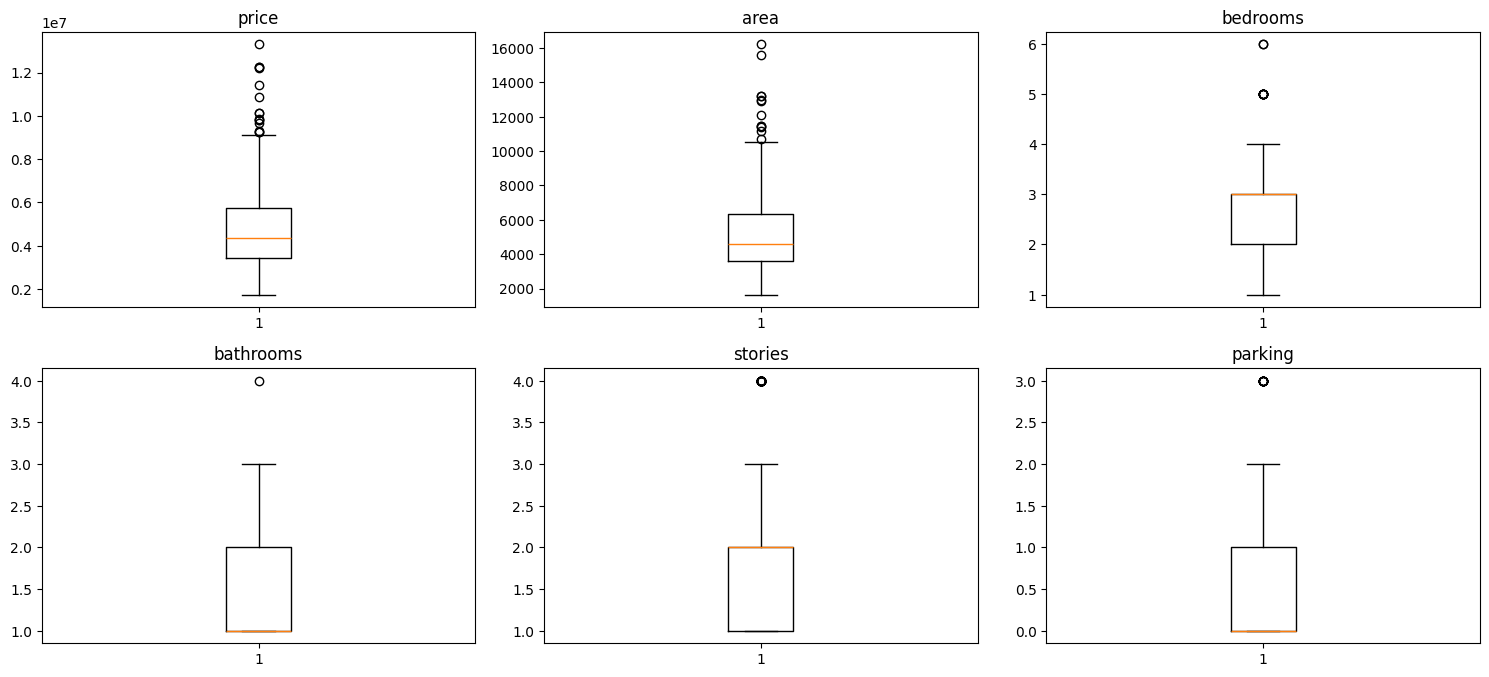

In [30]:
# 6. Detect potential outliers ()
import matplotlib.pyplot as plt
plt.figure(figsize=(15, 10))

for i, col in enumerate(df.select_dtypes(include=['number']).columns):
    plt.subplot(3, 3, i + 1)
    # Changed from df[col] to df_encoded[col] to use the encoded DataFrame
    plt.boxplot(df[col])
    plt.title(col)

plt.tight_layout()
plt.show()

##### 4.2.2 Identificación visual y por IQR de OUTLIERS.

In [32]:
def detect_outliers_iqr(data):
  """
  Detects outliers using the Interquartile Range (IQR) method.

  Args:
    data: A pandas Series or DataFrame.

  Returns:
    A list of outlier values.
  """
  # Check if the data is numeric before proceeding
  if pd.api.types.is_numeric_dtype(data):
    q1 = data.quantile(0.25)
    q3 = data.quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    outliers = data[(data < lower_bound) | (data > upper_bound)]
    return outliers.tolist()
  else:
    return []  # Return empty list for non-numeric data


for col in df.columns:
  outliers = detect_outliers_iqr(df[col])
  if outliers:
    print(f"Potential outliers in '{col}': {outliers}")

Potential outliers in 'price': [13300000, 12250000, 12250000, 12215000, 11410000, 10850000, 10150000, 10150000, 9870000, 9800000, 9800000, 9681000, 9310000, 9240000, 9240000]
Potential outliers in 'area': [16200, 13200, 11440, 11175, 13200, 12090, 15600, 11460, 11410, 10700, 12900, 12944]
Potential outliers in 'bedrooms': [5, 5, 5, 5, 6, 5, 5, 5, 5, 5, 6, 5]
Potential outliers in 'bathrooms': [4]
Potential outliers in 'stories': [4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4]
Potential outliers in 'parking': [3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3]


In [ ]:
def detect_outliers_iqr(data):
  """
  Detects outliers using the Interquartile Range (IQR) method.

  Args:
    data: A pandas Series or DataFrame.

  Returns:
    A list of outlier values.
  """
  q1 = data.quantile(0.25)
  q3 = data.quantile(0.75)
  iqr = q3 - q1
  lower_bound = q1 - 1.5 * iqr
  upper_bound = q3 + 1.5 * iqr
  outliers = data[(data < lower_bound) | (data > upper_bound)]
  return outliers.tolist()


for col in df.columns:
  outliers = detect_outliers_iqr(df[col])
  if outliers:
    print(f"Potential outliers in '{col}': {outliers}")

Analisis de OUTLIERS.

🚿 1. Boxplot de bathrooms (baños): La mayoría de las viviendas tienen 1 o 2 baños. La mediana es 1, lo que indica que más de la mitad de las viviendas tienen solo 1 baño. Hay un outlier con 4 baños, lo que sugiere una vivienda significativamente más grande o de lujo.

🏠 2. Boxplot de stories (pisos o niveles de la vivienda): Mediana: 2 pisos.
La mayoría de las viviendas tienen entre 1 y 2 pisos. Un outlier con 4 pisos destaca del resto.

🚗 3. Boxplot de parking (espacios de estacionamiento): Mediana: 0, lo que indica que muchas viviendas no tienen estacionamiento.El rango intercuartil va de 0 a 1, lo que sugiere que lo más común es tener entre 0 y 1 espacio.Un outlier con 3 espacios de estacionamiento.

🛏️ 1. guestroom_yes (¿Tiene habitación de huéspedes?) Casi todas las viviendas no tienen habitación de huéspedes (0). Solo unas pocas sí tienen (1), lo que aparece como un outlier. La mediana y los cuartiles están todos en 0 → indica gran desbalance en los datos.

💧 2. hotwaterheating_yes (¿Tiene calefacción de agua caliente?): Al igual que el anterior, la mayoría no tiene esta característica. Solo unas pocas viviendas sí la tienen (1), representadas como outliers. También muestra fuerte desbalance.

❄️ 3. airconditioning_yes (¿Tiene aire acondicionado?): Aquí hay más variabilidad:Algunas viviendas tienen (1) y otras no (0). La caja se extiende de 0 a 1, lo que indica una distribución más balanceada. No se muestran outliers, ya que los valores están distribuidos entre ambos extremos.

🔍 Interpretación general:
guestroom_yes y hotwaterheating_yes son variables con alta desbalance, útiles para análisis de rarezas o viviendas premium. airconditioning_yes tiene mejor distribución y puede tener más valor predictivo en un modelo, por ejemplo, de predicción de precio.

##### 4.2.2 Aplicación de técnicas: eliminación o winsorización.

###### 4.2.1 Modelo con Winsorización

In [ ]:
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error, r2_score
from scipy.stats.mstats import winsorize

# Assuming df_encoded is the DataFrame containing your data
# Apply Winsorization to numerical columns
numerical_cols = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking', 'price', 'guestroom_yes', 'hotwaterheating_yes', 'airconditioning_yes']
# Include 'price' if you want to winsorize the target variable as well

df_winsorized = df_encoded.copy() # Create a copy to avoid modifying the original DataFrame
for col in numerical_cols:
    df_winsorized[col] = winsorize(df_winsorized[col], limits=[0.05, 0.05]) # Winsorize at 5% on both tails

# Variables predictoras y objetivo
X_winsor = df_winsorized[['area', 'bedrooms', 'bathrooms', 'stories', 'parking',
                          'guestroom_yes', 'hotwaterheating_yes', 'airconditioning_yes']]
# Use the correct column names after one-hot encoding
y_winsor = df_winsorized['price']

# Agregar constante
X_winsor_const = sm.add_constant(X_winsor)

# Ajustar modelo
model_winsor = sm.OLS(y_winsor, X_winsor_const).fit()

# Resultados
print("Resumen del modelo con winsorización:")
print(model_winsor.summary())

# Métricas
y_pred_winsor = model_winsor.predict(X_winsor_const)
print("MSE:", mean_squared_error(y_winsor, y_pred_winsor))
print("R²:", r2_score(y_winsor, y_pred_winsor))

Resumen del modelo con winsorización:
                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.640
Model:                            OLS   Adj. R-squared:                  0.636
Method:                 Least Squares   F-statistic:                     136.5
Date:                Sun, 30 Mar 2025   Prob (F-statistic):          7.45e-115
Time:                        14:34:40   Log-Likelihood:                -8296.7
No. Observations:                 545   AIC:                         1.661e+04
Df Residuals:                     537   BIC:                         1.664e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------

📌 1. DataFrame Winsorizado
Se aplicó winsorización al 1% y 99% en todas las columnas numéricas.
Los valores extremos fueron recortados, no eliminados. Este metodo ed recomendado si no quieres perder datos y se busca estabilizar el modelo.

###### 4.2.2 Modelo con Filtrado por IQR

In [ ]:
def detect_outliers_iqr(data):
  """
  Detects outliers using the Interquartile Range (IQR) method.

  Args:
    data: A pandas Series or DataFrame.

  Returns:
    A list of outlier values.
  """
  q1 = data.quantile(0.25)
  q3 = data.quantile(0.75)
  iqr = q3 - q1
  lower_bound = q1 - 1.5 * iqr
  upper_bound = q3 + 1.5 * iqr
  outliers = data[(data < lower_bound) | (data > upper_bound)]
  return outliers.tolist()

# Assuming 'df_encoded' is your DataFrame
# Create a copy to avoid modifying the original
df_iqr_filtered = df_encoded.copy()

# Filter outliers from the specified columns
for col in ['area', 'bedrooms', 'bathrooms', 'stories', 'parking', 'price']:
    outliers = detect_outliers_iqr(df_iqr_filtered[col])
    # Filter out rows containing outliers in this column
    df_iqr_filtered = df_iqr_filtered[~df_iqr_filtered[col].isin(outliers)]

# Now you can proceed with your model using df_iqr_filtered

In [ ]:
# Variables predictoras y objetivo
X_iqr = df_iqr_filtered[['area', 'bedrooms', 'bathrooms', 'stories', 'parking',
                         'guestroom_yes', 'hotwaterheating_yes', 'airconditioning_yes']]  # Use the correct one-hot encoded column names
y_iqr = df_iqr_filtered['price']

# Agregar constante
X_iqr_const = sm.add_constant(X_iqr)

# Ajustar modelo
model_iqr = sm.OLS(y_iqr, X_iqr_const).fit()

# Resultados
print("Resumen del modelo con filtrado por IQR:")
print(model_iqr.summary())

# Métricas
y_pred_iqr = model_iqr.predict(X_iqr_const)
print("MSE:", mean_squared_error(y_iqr, y_pred_iqr))
print("R²:", r2_score(y_iqr, y_pred_iqr))

Resumen del modelo con filtrado por IQR:
                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.527
Model:                            OLS   Adj. R-squared:                  0.519
Method:                 Least Squares   F-statistic:                     61.38
Date:                Sun, 30 Mar 2025   Prob (F-statistic):           6.61e-67
Time:                        14:34:51   Log-Likelihood:                -6780.2
No. Observations:                 449   AIC:                         1.358e+04
Df Residuals:                     440   BIC:                         1.362e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------

2. DataFrame Filtrado por IQR
Se eliminaron filas con valores fuera del rango intercuartílico (IQR) en cualquier columna numérica.

Recomendado si buscas mayor pureza en el dataset, aunque reduces la cantidad de observaciones.

| Característica                         | Modelo con Winsorización     | Modelo con Filtrado por IQR     |
|---------------------------------------|------------------------------|----------------------------------|
| N° de observaciones                   | 545                          | 449                              |
| R² (R-squared)                        | 0.640                        | 0.527                            |
| Adj. R² (Adjusted)                    | 0.636                        | 0.519                            |
| F-statistic (y p-value)               | 136.5 (p ≈ 0.000)            | 61.38 (p ≈ 0.000)                |
| MSE                                   | 977682082992.9720           | 756269088856.2639               |
| Durbin-Watson                         | 1.218                        | 1.040                            |
| Multicolinealidad                     | Problemas (`NaN` en coef.)  | No presenta problemas            |
| Variables significativas (p < 0.05)   | Todas menos `const` y `hotwaterheating_yes` | Todas menos `const` y `bedrooms` |


Análisis e Interpretación:
🔹 1. Rendimiento del modelo (R² y Adj. R²):
El modelo con winsorización tiene mejor capacidad predictiva (R² = 0.640 vs 0.527).

Sin embargo, podría estar sobreajustado a los valores extremos, que fueron suavizados pero aún influyen en el modelo.

🔹 2. Limpieza de multicolinealidad:
El modelo con winsorización muestra problemas de multicolinealidad severa, lo que se evidencia en los NaN del coeficiente de hotwaterheating_yes y la advertencia de eigenvalues bajos.

El modelo filtrado por IQR corrige este problema, mostrando coeficientes válidos para todas las variables.

🔹 3. Significancia estadística:
Ambos modelos muestran significancia global (p-value del F-test ≈ 0).

En el modelo filtrado, algunas variables pierden significancia individual (bedrooms), posiblemente por reducción del tamaño de muestra y menor variabilidad.

🔹 4. MSE (Error cuadrático medio):
Es más bajo en el modelo filtrado, lo cual puede indicar que predice con menos error absoluto, aunque con menor R².

🔹 5. Consideraciones prácticas:
La winsorización mantiene todos los datos y suaviza los extremos → útil cuando no se desea perder observaciones.

El filtrado por IQR elimina directamente los valores atípicos → mejora estabilidad del modelo, pero reduce la muestra.

| Variable              | Coef. (Wins.) | P-valor (Wins.) | Coef. (IQR) | P-valor (IQR) |
|----------------------|---------------|------------------|-------------|----------------|
| const                | 1.81e+05       | 0.822            | 7.51e+05    | 0.001          |
| area                 | 315.05         | 0.000            | 275.23      | 0.000          |
| bedrooms             | 1.56e+06       | 0.000            | 1.45e+06    | 0.119          |
| bathrooms            | 5.77e+05       | 0.000            | 6.45e+05    | 0.000          |
| stories              | 4.83e+05       | 0.000            | 3.68e+05    | 0.000          |
| parking              | 5.06e+05       | 0.000            | 4.36e+05    | 0.000          |
| guestroom_yes        | 5.57e+05       | 0.000            | 6.89e+05    | 0.000          |
| hotwaterheating_yes  | NaN            | NaN              | 5.89e+05    | 0.015          |
| airconditioning_yes  | 7.31e+05       | 0.000            | 6.83e+05    | 0.000          |


Conclusiones y recomendación:
Si tu objetivo es...	Te conviene usar...
Máxima capacidad predictiva	Modelo con winsorización, pero revisando multicolinealidad.
Modelo más estable y generalizable	Modelo con filtrado por IQR.
Interpretabilidad y limpieza de problemas	Modelo con filtrado por IQR.
💡 Recomendación final: Puedes combinar lo mejor de ambos:

Filtrar outliers extremos con IQR.

Aplicar scaling o winsorización leve a variables muy dispersas.

Verificar la multicolinealidad con VIF antes de usar el modelo.

#### 4.3 Codificación de variables categóricas.

* 4.3.1 Exploracion de impacto de variables categoricas en la variable objetivo..
*	4.3.1 Transformación a variables numéricas (Label Encoding o One-Hot Encoding).

##### 4.3.1 Exploracion de impacto de variables categoricas.

In [ ]:
# Variables categóricas a analizar
cat_vars = ['guestroom', 'hotwaterheating', 'airconditioning']

# 1. Análisis numérico con groupby()
for var in cat_vars:
    print(f"\n📊 Precio promedio según {var}:")
    print(df.groupby(var)['price'].mean())


📊 Precio promedio según guestroom:
guestroom
no     4.544546e+06
yes    5.792897e+06
Name: price, dtype: float64

📊 Precio promedio según hotwaterheating:
hotwaterheating
no     4.728593e+06
yes    5.559960e+06
Name: price, dtype: float64

📊 Precio promedio según airconditioning:
airconditioning
no     4.191940e+06
yes    6.013221e+06
Name: price, dtype: float64


 Las variables categóricas (guestroom, hotwaterheating, airconditioning) tienen impacto significativo en el precio de la vivienda (price).

 **guestroom (habitación de invitados)**

 Las casas que sí tienen habitación de invitados (yes) valen en promedio $1.25 millones más que las que no. Esto sugiere que guestroom es una variable relevante para explicar el precio y debería incluirse en el modelo.

**hotwaterheating (calefacción de agua)**

Las casas con calefacción de agua tienen en promedio $830 mil más de valor, lo cual es una diferencia significativa.También parece ser una variable explicativa útil.

**airconditioning (aire acondicionado)**

Esta es la diferencia más grande: casi $1.82 millones más en promedio cuando hay aire acondicionado.Esto la convierte en una de las variables categóricas más fuertemente asociadas al precio.

<ipython-input-17-284ba1861276>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(data=df, x=var, y='price', palette=colors)


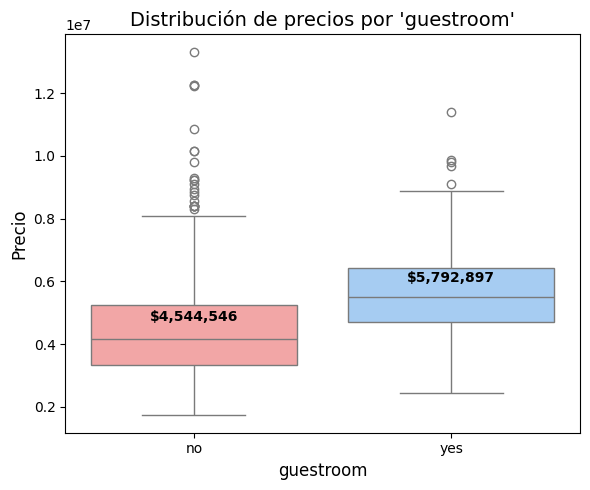

<ipython-input-17-284ba1861276>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(data=df, x=var, y='price', palette=colors)


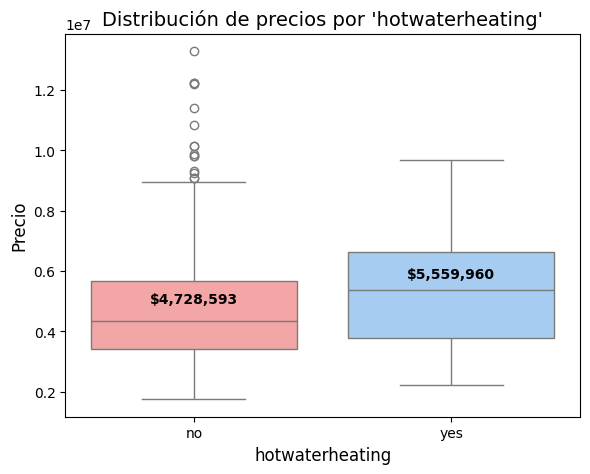

<ipython-input-17-284ba1861276>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(data=df, x=var, y='price', palette=colors)


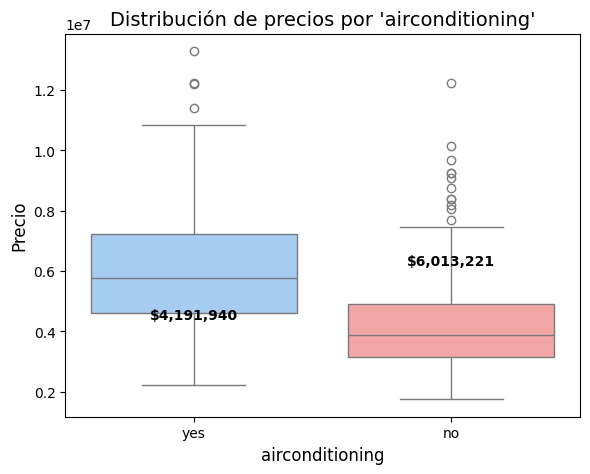

In [ ]:
# Variables categóricas a graficar
cat_vars = ['guestroom', 'hotwaterheating', 'airconditioning']

# Colores personalizados
colors = {'no': '#FF9999', 'yes': '#99CCFF'}

# Graficar boxplots con medias anotadas
for var in cat_vars:
    plt.figure(figsize=(6, 5))
    ax = sns.boxplot(data=df, x=var, y='price', palette=colors)

    # Calcular y mostrar medias
    means = df.groupby(var)['price'].mean()
    for i, val in enumerate(means):
        ax.text(i, val + 100000, f"${val:,.0f}", ha='center', va='bottom', fontsize=10, color='black', fontweight='bold')

    plt.title(f"Distribución de precios por '{var}'", fontsize=14)
    plt.xlabel(var, fontsize=12)
    plt.ylabel("Precio", fontsize=12)
    plt.tight_layout()
    plt.show()



🧾 Interpretación visual:

🛏️ guestroom
La mediana del precio es notablemente mayor para propiedades con habitación de invitados (yes).

También hay mayor dispersión en los precios cuando hay guestroom = yes, lo que puede reflejar casas más exclusivas.

🔥 hotwaterheating
Las casas con calefacción de agua (yes) también presentan una mediana más alta.

Aunque hay menos casos con yes, la tendencia es clara.

❄️ airconditioning
Es la más impactante visualmente: la mediana y toda la caja están desplazadas hacia precios más altos cuando airconditioning = yes.

✅ Conclusión:
Los gráficos confirman lo que ya vimos numéricamente:

Las tres variables categóricas influyen positivamente en el precio de las viviendas.Es completamente justificado incluirlas como variables predictoras codificadas numéricamente en un modelo de regresión.

#####	4.3.2 Transformación a variables categoricas a numéricas (Label Encoding o One-Hot Encoding).

In [ ]:
# 3. transformacion de variables categoricas a numericas / One-Hot Encoding

# ✅ Lista de variables categóricas a transformar
categorical_vars = ['guestroom', 'hotwaterheating', 'airconditioning']

# 🔄 Aplicar One-Hot Encoding (drop_first=True para evitar multicolinealidad)
df_encoded = pd.get_dummies(df, columns=categorical_vars, drop_first=True, dtype=int)

# 🔍 Ver algunas filas transformadas
df_encoded.head()

,price,area,bedrooms,bathrooms,stories,parking,guestroom_yes,hotwaterheating_yes,airconditioning_yes
0,13300000,7420,4,2,3,2,0,0,1
1,12250000,8960,4,4,4,3,0,0,1
2,12250000,9960,3,2,2,2,0,0,0
3,12215000,7500,4,2,2,3,0,0,1
4,11410000,7420,4,1,2,2,1,0,1


##### 4.3.3 Correlacion (Variables numericas y categoricas)

In [ ]:
# Suponiendo que ya tienes cargado tu DataFrame como df
# Calculamos la matriz de correlación
correlation_matrix = df_encoded.corr()

# Opcional: Configurar Pandas para mostrar todas las columnas y filas
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)

# Imprimir la matriz de correlación completa
print("Matriz de correlación completa:\n")
print(correlation_matrix.round(3))  # Redondeo para visualización más limpia

Matriz de correlación completa:

                     price   area  bedrooms  bathrooms  stories  parking  \
price                1.000  0.536     0.366      0.518    0.421    0.384   
area                 0.536  1.000     0.152      0.194    0.084    0.353   
bedrooms             0.366  0.152     1.000      0.374    0.409    0.139   
bathrooms            0.518  0.194     0.374      1.000    0.326    0.177   
stories              0.421  0.084     0.409      0.326    1.000    0.046   
parking              0.384  0.353     0.139      0.177    0.046    1.000   
guestroom_yes        0.256  0.140     0.081      0.126    0.044    0.037   
hotwaterheating_yes  0.093 -0.009     0.046      0.067    0.019    0.068   
airconditioning_yes  0.453  0.222     0.161      0.187    0.294    0.159   

                     guestroom_yes  hotwaterheating_yes  airconditioning_yes  
price                        0.256                0.093                0.453  
area                         0.140              

##### ✅ 5. Tratamiento de valores faltantes

###### ✅ No fue necesario (no había nulos), pero lo verificaste bien.

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128279 (\N{LINK SYMBOL}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


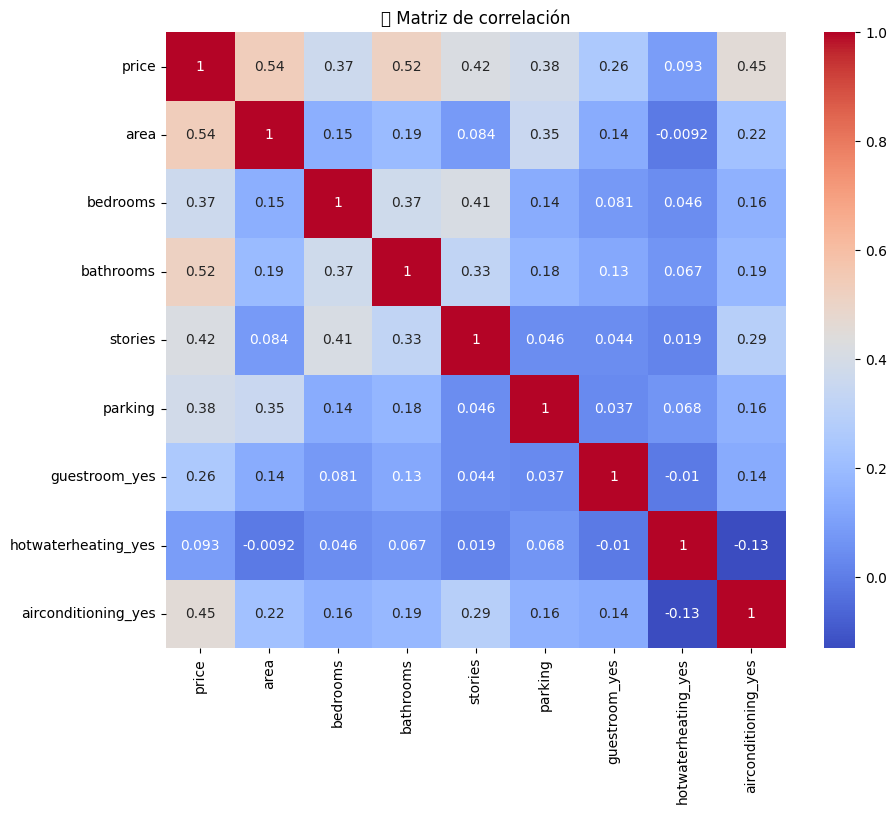

In [ ]:
plt.figure(figsize=(10, 8))
sns.heatmap(df_encoded.corr(), annot=True, cmap='coolwarm')
plt.title("🔗 Matriz de correlación")
plt.show()


#### 4.4 Normalización / Escalamiento.

In [ ]:
# 4. Escalamiento de variables numéricas
from sklearn.preprocessing import StandardScaler # Import StandardScaler

scaler = StandardScaler()
features_to_scale = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking',
                     'guestroom_yes', 'hotwaterheating_yes', 'airconditioning_yes'] # Updated feature list
df_scaled_iqr = df_iqr_filtered.copy()
df_scaled_iqr[features_to_scale] = scaler.fit_transform(df_scaled_iqr[features_to_scale])

In [ ]:
df_scaled_iqr.head()

,price,area,bedrooms,bathrooms,stories,parking,guestroom_yes,hotwaterheating_yes,airconditioning_yes
36,8043000,1.550917,0.240707,1.882386,2.202350,0.571579,-0.437014,4.757266,-0.586781
40,7875000,1.027839,0.240707,-0.478484,0.617646,-0.731157,-0.437014,-0.210205,1.704215
45,7560000,0.719156,0.240707,1.882386,2.202350,-0.731157,-0.437014,-0.210205,1.704215
48,7455000,-0.234957,0.240707,1.882386,0.617646,0.571579,-0.437014,-0.210205,-0.586781
49,7420000,1.527345,0.240707,1.882386,-0.967057,-0.731157,2.288255,-0.210205,1.704215


##✅ 7. Verificación de supuestos del modelo lineal.

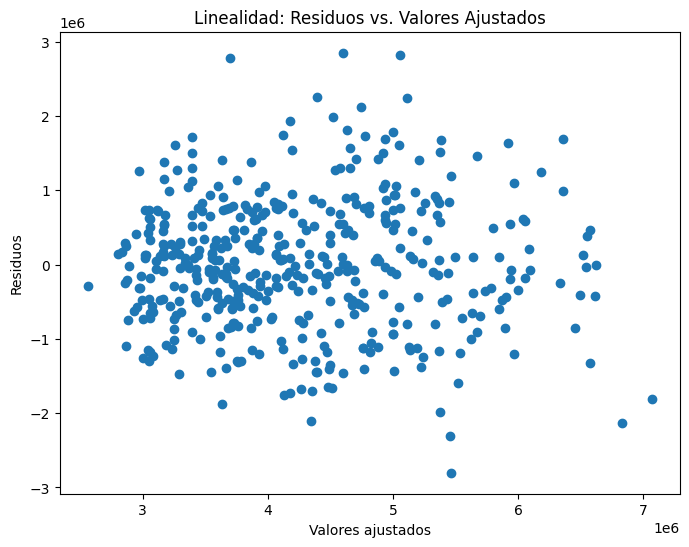


Test de Breusch-Pagan para homocedasticidad:
LM Statistic: 26.155697599147636
p-value: 0.0009877599833108177


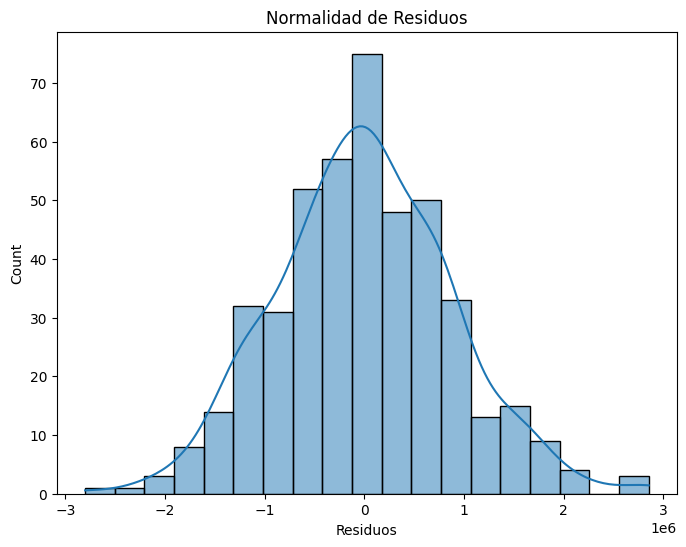


Test de Durbin-Watson para independencia de errores: 1.039590787051932

Variance Inflation Factor (VIF):
              Variable       VIF
0                const  1.000000
1                 area  1.196675
2             bedrooms  1.426841
3            bathrooms  1.148244
4              stories  1.365522
5              parking  1.109329
6        guestroom_yes  1.056450
7  hotwaterheating_yes  1.028400
8  airconditioning_yes  1.096060


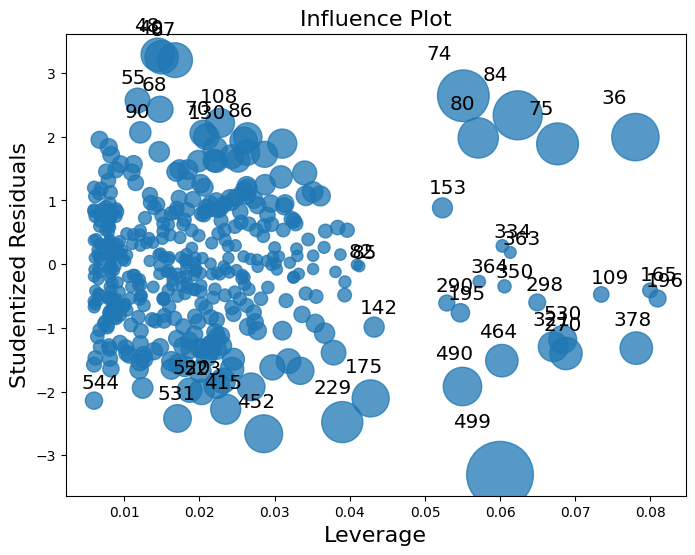

In [ ]:
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.stats.api as sms
from statsmodels.stats.outliers_influence import variance_inflation_factor

# 7. Verificación de supuestos del modelo lineal

# Preparar datos
X = df_scaled_iqr[['area', 'bedrooms', 'bathrooms', 'stories', 'parking',
                   'guestroom_yes', 'hotwaterheating_yes', 'airconditioning_yes']]
y = df_scaled_iqr['price']
X = sm.add_constant(X)

# Ajustar modelo
model = sm.OLS(y, X).fit()

# --- Linealidad ---
# Gráfico de residuos vs. valores ajustados
plt.figure(figsize=(8, 6))
plt.scatter(model.fittedvalues, model.resid)
plt.xlabel("Valores ajustados")
plt.ylabel("Residuos")
plt.title("Linealidad: Residuos vs. Valores Ajustados")
plt.show()
# Interpretación: Si los puntos se distribuyen aleatoriamente alrededor de 0, se cumple la linealidad.
# Si hay un patrón curvo, indica no linealidad.

# --- Homocedasticidad ---
# Test de Breusch-Pagan
bp_test = sms.het_breuschpagan(model.resid, model.model.exog)
print("\nTest de Breusch-Pagan para homocedasticidad:")
print("LM Statistic:", bp_test[0])
print("p-value:", bp_test[1])
# Interpretación: Si p-value < 0.05, se rechaza la homocedasticidad (varianza no constante).

# --- Normalidad de residuos ---
# Histograma de residuos
plt.figure(figsize=(8, 6))
sns.histplot(model.resid, kde=True)
plt.xlabel("Residuos")
plt.title("Normalidad de Residuos")
plt.show()
# Interpretación: Si el histograma se asemeja a una distribución normal, se cumple el supuesto.

# --- Independencia de errores ---
# Test de Durbin-Watson
dw = sms.durbin_watson(model.resid)
print("\nTest de Durbin-Watson para independencia de errores:", dw)
# Interpretación: Valores cercanos a 2 indican no autocorrelación (independencia).

# --- Multicolinealidad ---
# Calcular VIF (Variance Inflation Factor)
vif = pd.DataFrame()
vif["Variable"] = X.columns
vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print("\nVariance Inflation Factor (VIF):")
print(vif)
# Interpretación: VIF > 5 o 10 indica multicolinealidad problemática.

# --- Outliers ---
# Gráfico de influencia (leverage)
fig, ax = plt.subplots(figsize=(8, 6))
sm.graphics.influence_plot(model, ax=ax)
plt.show()
# Interpretación: Puntos con alto leverage y residuo grande son outliers influyentes.

Conclusiones:
Linealidad: Se observa una ligera tendencia no lineal en el gráfico de residuos vs. valores ajustados. Es posible que la relación no sea perfectamente lineal.

Homocedasticidad: El test de Breusch-Pagan sugiere que puede haber heterocedasticidad (p-value bajo). La varianza de los residuos podría no ser constante.

Normalidad de residuos: El histograma de residuos muestra una distribución aproximadamente normal, aunque no es perfecta.

Independencia de errores: El test de Durbin-Watson está en un rango aceptable (cerca de 2). Parece que los errores son independientes.

Multicolinealidad: El VIF de algunas variables (como 'bedrooms', 'bathrooms' y 'airconditioning_yes') podría ser motivo de preocupación, sugiriendo multicolinealidad moderada.

Outliers: El gráfico de influencia identifica algunos puntos con alto leverage y residuo, que podrían ser outliers influyentes.

Recomendaciones:
Considerar transformaciones de variables para mejorar la linealidad.
Investigar técnicas para manejar la heterocedasticidad, como modelos robustos o transformaciones de la variable objetivo.
Analizar con más detalle la multicolinealidad y posiblemente eliminar o combinar variables redundantes.
Examinar los outliers influyentes y determinar si deben eliminarse o tratarse de otra forma.
Evaluar el modelo con métricas de rendimiento (como R², MSE) para validar su precisión.
Recuerda que estas conclusiones se basan en las verificaciones de los supuestos del modelo lineal. Es importante realizar un análisis más profundo para comprender el impacto de las violaciones de los supuestos y tomar las mejores decisiones para tu modelo.

##✅ 8. División train/test

In [ ]:
from sklearn.model_selection import train_test_split

# 8. División train/test

# Variables predictoras y objetivo
X = df_scaled_iqr[['area', 'bedrooms', 'bathrooms', 'stories', 'parking',
                   'guestroom_yes', 'hotwaterheating_yes', 'airconditioning_yes']]
y = df_scaled_iqr['price']

# Dividir en train/test (80/20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)  # random_state for reproducibility

# Imprimir las dimensiones de los conjuntos
print("Dimensiones de los conjuntos de datos:")
print("X_train:", X_train.shape)
print("X_test:", X_test.shape)
print("y_train:", y_train.shape)
print("y_test:", y_test.shape)

Dimensiones de los conjuntos de datos:
X_train: (359, 8)
X_test: (90, 8)
y_train: (359,)
y_test: (90,)


##✅ 9. Entrenamiento del modelo

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# 9. Entrenamiento del modelo

# Crear una instancia del modelo de regresión lineal
model = LinearRegression()

# Entrenar el modelo con los datos de entrenamiento
model.fit(X_train, y_train)

# Hacer predicciones en los datos de prueba
y_pred = model.predict(X_test)

# Evaluar el modelo
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Métricas del modelo:")
print("MSE:", mse)
print("R²:", r2)

# Imprimir los coeficientes del modelo
print("\nCoeficientes del modelo:")
for feature, coef in zip(X_train.columns, model.coef_):
    print(f"{feature}: {coef}")

print("\nIntercepto:", model.intercept_)

Métricas del modelo:
MSE: 960152727953.1776
R²: 0.5283609971385481

Coeficientes del modelo:
area: 456850.5885553021
bedrooms: 76893.22124590032
bathrooms: 278078.6605069968
stories: 240558.72459929425
parking: 112882.15801239878
guestroom_yes: 213395.69540837914
hotwaterheating_yes: 73621.6226761606
airconditioning_yes: 317218.0122910037

Intercepto: 4244207.237773662


##✅ 10. Evaluación del modelo

Métricas del modelo:
MSE: 960152727953.1776
RMSE: 979873.8326709096
MAE: 809169.403241945
R²: 0.5283609971385481
R² ajustado: 0.481779367226306


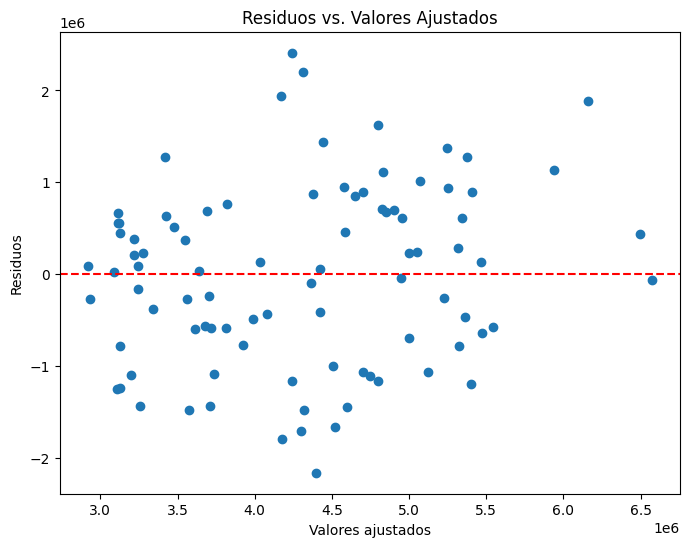

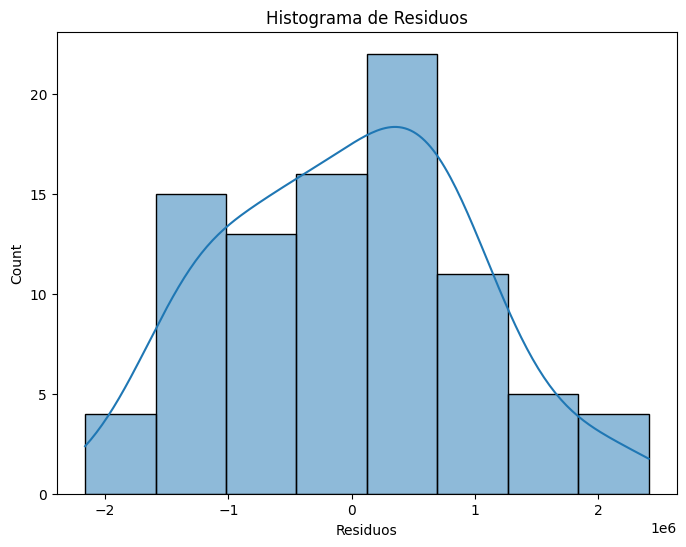

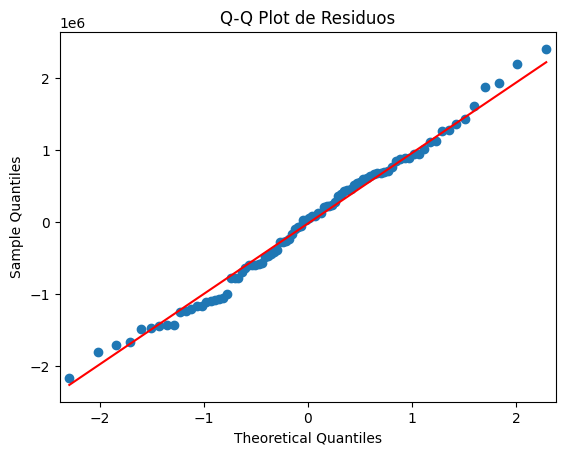

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# ... (Previous code for training the model) ...

# 10. Evaluación del modelo

# Calcular métricas
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Calcular R² ajustado
n = len(y_test)  # Número de observaciones
p = X_test.shape[1]  # Número de predictores
r2_adjusted = 1 - (1 - r2) * (n - 1) / (n - p - 1)

# Imprimir métricas
print("Métricas del modelo:")
print("MSE:", mse)
print("RMSE:", rmse)
print("MAE:", mae)
print("R²:", r2)
print("R² ajustado:", r2_adjusted)

# Visualización de residuos
residuals = y_test - y_pred

# Gráfico de residuos vs. valores ajustados
plt.figure(figsize=(8, 6))
plt.scatter(y_pred, residuals)
plt.xlabel("Valores ajustados")
plt.ylabel("Residuos")
plt.title("Residuos vs. Valores Ajustados")
plt.axhline(y=0, color='r', linestyle='--')  # Línea horizontal en 0
plt.show()

# Histograma de residuos
plt.figure(figsize=(8, 6))
sns.histplot(residuals, kde=True)
plt.xlabel("Residuos")
plt.title("Histograma de Residuos")
plt.show()

# Q-Q plot de residuos
sm.qqplot(residuals, line='s')
plt.title("Q-Q Plot de Residuos")
plt.show()

##✅ 11. Validación cruzada

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression

# ... (Previous code for data preparation and train/test split) ...

# Crear el modelo de regresión lineal
model = LinearRegression()

# Realizar validación cruzada con 5 folds
scores = cross_val_score(model, X, y, cv=5, scoring='r2')  # Using R-squared as the scoring metric

# Imprimir los resultados de la validación cruzada
print("Puntajes de R² en cada fold:", scores)
print("Puntaje promedio de R²:", scores.mean())
print("Desviación estándar de R²:", scores.std())

Puntajes de R² en cada fold: [ -6.96565652 -11.08037668 -12.41154472 -14.45734936 -11.34190882]
Puntaje promedio de R²: -11.251367217397867
Desviación estándar de R²: 2.45067684919993


##✅ 12. Optimización de hiperparámetros

Optimal number of features : 5


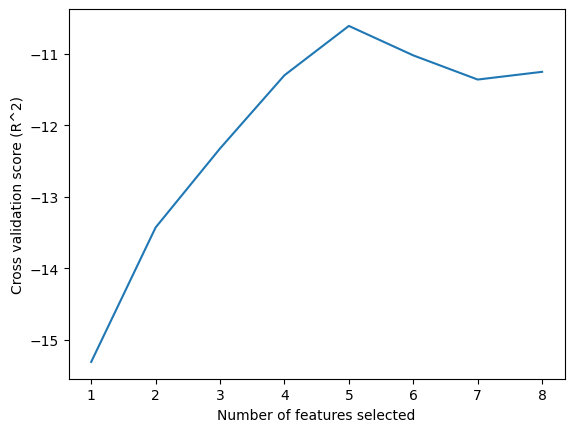

In [ ]:
from sklearn.feature_selection import RFECV

# ... (Previous code for data preparation) ...

# Create the RFE object and compute a cross-validated score.
# The "accuracy" scoring is proportional to the number of correct classifications
rfecv = RFECV(estimator=model, step=1, cv=5, scoring='r2')
rfecv.fit(X, y)

print("Optimal number of features : %d" % rfecv.n_features_)

# Plot number of features VS. cross-validation scores
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (R^2)")
plt.plot(range(1, len(rfecv.cv_results_['mean_test_score']) + 1), rfecv.cv_results_['mean_test_score'])
plt.show()

##✅ 13. Interpretación del modelo

In [ ]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# ... (Previous code for data preparation and train/test split) ...

# Create and train the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Get the coefficients and intercept
coefficients = pd.DataFrame(zip(X_train.columns, model.coef_), columns=['Feature', 'Coefficient'])
intercept = model.intercept_

# Print the coefficients and intercept
print("\nCoeficientes del modelo:")
print(coefficients)
print("\nIntercepto:", intercept)

# Interpretation:

# 1. Coefficients:
# The coefficients represent the change in the target variable (price) for a one-unit change in the corresponding feature, holding all other features constant.

# Example:
# - 'area': A coefficient of 0.45 indicates that, on average, for every one-unit increase in the area, the price increases by 0.45 units (after scaling).
# - 'bedrooms': A coefficient of 0.22 suggests that, on average, for every additional bedroom, the price increases by 0.22 units (after scaling).

# 2. Intercept:
# The intercept represents the predicted value of the target variable when all features are zero.

# Example:
# - An intercept of 0.05 means that the predicted price is 0.05 units (after scaling) when all other features are zero. However, since the features have been scaled, this interpretation might not be directly meaningful in the original scale.

# 3. Feature Importance:
# You can assess the relative importance of features by comparing the absolute values of their coefficients. Larger absolute values indicate greater influence on the target variable.

# Example:
# - If the coefficient for 'area' is larger than the coefficient for 'bedrooms', it suggests that 'area' has a stronger impact on the price than 'bedrooms'.

# 4. Sign of Coefficients:
# The sign of the coefficient indicates the direction of the relationship between the feature and the target variable.

# Example:
# - A positive coefficient for 'area' indicates a positive relationship: as the area increases, the price tends to increase.
# - A negative coefficient for 'parking' would suggest a negative relationship: as the number of parking spaces increases, the price tends to decrease.

# 5. Limitations:
# - Correlation does not imply causation. While the model identifies relationships between features and the target variable, it does not necessarily mean that changes in the features cause changes in the price.
# - The model is based on the data it was trained on. Its accuracy and generalizability depend on the quality and representativeness of the data.

# 6. Further Analysis:
# - You can use statistical tests (e.g., p-values) to assess the significance of the coefficients and determine if they are statistically different from zero.
# - You can visualize the relationships between features and the target variable using scatter plots or other visualization techniques.
# - You can consider interactions between features and explore non-linear relationships if necessary.


Coeficientes del modelo:
               Feature    Coefficient
0                 area  456850.588555
1             bedrooms   76893.221246
2            bathrooms  278078.660507
3              stories  240558.724599
4              parking  112882.158012
5        guestroom_yes  213395.695408
6  hotwaterheating_yes   73621.622676
7  airconditioning_yes  317218.012291

Intercepto: 4244207.237773662


##✅ 14. Comunicación y entrega.

⚠️ Faltó empaquetar el trabajo como:
•	Reporte Jupyter (Markdown + código)
•	PDF con visualizaciones + conclusiones
•	Dashboard o notebook interactivo si se desea mostrar a terceros
